Disclaimer

Some parts of this project were developed with occasional assistance and guidance from AI-based tools, primarily to support technical implementation and improve code efficiency. All analyses, decisions, and interpretations presented here reflect the author’s own understanding and critical thinking.

Watch out, I tried a part for optimization of hyperparameter and the execution is very long (in the first business question)

Member: Félix GUASP

# Introduction

As part of this applied data science consulting project, our team was tasked by a financial consulting firm to analyze a dataset of banking customers and apply machine learning techniques to generate actionable insights and build predictive models. The objective was to simulate a realistic mission that could be carried out for a financial institution looking to optimize credit risk management and decision-making processes.

**Dataset Presentation**

The dataset includes 100,000 anonymized customer records with a wide variety of features related to:

- Payment behavior (e.g., `Payment_Behaviour`, `Payment_of_Min_Amount`)
- Financial profile (`Annual_Income`, `Outstanding_Debt`, `Credit_Utilization_Ratio`)
- Credit history and inquiries (`Credit_History_Age`, `Num_Credit_Inquiries`)
- Loan information (`Type_of_Loan`, a multi-label textual field)
- Investment patterns (`Amount_invested_monthly`)
- The target variable: `Credit_Score`, categorized into *Poor*, *Standard*, and *Good*

**Dataset Source**

The dataset is inspired by publicly available financial data found on platforms such as World Bank Open Data, Data.gov, and other synthetic financial datasets. It is built to realistically simulate the financial and behavioral patterns of banking customers, with enough diversity and depth to support meaningful analysis.

**Project Objective**

The main goals of the project are to:

1. Predict a client’s credit score using a variety of financial, behavioral, and demographic features.
2. Explore the potential of textual and semi-structured data to enhance model accuracy and interpretability.
3. Extract insights that can support risk management and credit decision strategies in a banking context.

**Why This Dataset is Interesting**

This dataset stands out due to the following characteristics:

- It covers multiple dimensions of customer profiles, allowing for a multi-faceted analysis.
- It includes complex categorical and textual variables that challenge the way models handle real-world data.
- It supports two clearly defined business questions:
  - One based on structured financial and behavioral data.
  - Another based on textual analysis of loan types and borrowing strategies.
- It is large enough to support robust training and validation of machine learning models.

**Mission Framework**

As consultants working on behalf of a financial client, our mission involves:

- Cleaning, exploring, and transforming the dataset.
- Formulating two strategic business questions.
- Building and evaluating appropriate machine learning models.
- Presenting interpretable results through visualizations, metrics, and recommendations.
- Delivering real business value through actionable insights that could inform credit risk policy and customer segmentation.


# Import

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

from sklearn.model_selection import train_test_split, cross_val_score, ParameterGrid
from sklearn.preprocessing import LabelEncoder, StandardScaler, QuantileTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA


pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

# Data Loading




In [63]:
df_train = pd.read_csv("dataset.csv", sep=';', decimal=',')

# Display data

In [64]:
print("Shape du dataset :", df_train.shape)
df_train.head()

Shape du dataset : (100000, 22)


,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,55,Entrepreneur,60244.72,6,6,0.02,3,payday loan|mortgage loan|home equity loan,29,17,6.53,0,Good,"989,42",37.548914,266,No,105.662479,49.065258,Low_spent_Large_value_payments,352.474366,Good
1,55,Entrepreneur,60244.72,6,6,0.02,3,payday loan|mortgage loan|home equity loan,29,15,6.53,0,Good,"989,42",32.614579,267,No,105.662479,49.065258,High_spent_Medium_value_payments,518.834155,Good
2,55,Entrepreneur,60244.72,6,6,0.02,3,payday loan|mortgage loan|home equity loan,29,19,11.53,0,Good,"989,42",34.860180,268,NM,105.662479,49.065258,Low_spent_Large_value_payments,473.729477,Good
3,55,Entrepreneur,60244.72,6,6,0.02,3,payday loan|mortgage loan|home equity loan,29,18,6.53,3,Good,"989,42",35.032251,269,No,105.662479,49.065258,High_spent_Medium_value_payments,447.962816,Good
4,55,Entrepreneur,60244.72,6,6,0.02,3,payday loan|mortgage loan|home equity loan,29,18,6.53,3,Good,"989,42",26.236033,270,No,105.662479,49.065258,High_spent_Large_value_payments,605.011596,Good


In [65]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  int64  
 1   Occupation                100000 non-null  object 
 2   Annual_Income             100000 non-null  float64
 3   Num_Bank_Accounts         100000 non-null  int64  
 4   Num_Credit_Card           100000 non-null  int64  
 5   Interest_Rate             100000 non-null  float64
 6   Num_of_Loan               100000 non-null  int64  
 7   Type_of_Loan              100000 non-null  object 
 8   Delay_from_due_date       100000 non-null  int64  
 9   Num_of_Delayed_Payment    100000 non-null  int64  
 10  Changed_Credit_Limit      100000 non-null  float64
 11  Num_Credit_Inquiries      100000 non-null  int64  
 12  Credit_Mix                100000 non-null  object 
 13  Outstanding_Debt          100000 non-null  ob

# Data processing

In [66]:
df_train["Outstanding_Debt"] = df_train["Outstanding_Debt"].str.replace(",", ".").astype(float)

df_train.dtypes

df_train.isnull().sum()


# Transformer to reshape the distribution (normal approx) then rescale it to realistic range
qt = QuantileTransformer(output_distribution='normal', random_state=0)

# Apply the transformer on the original interest rate column (reshape required)
interest_reshaped = df_train['Interest_Rate'].values.reshape(-1, 1)
interest_transformed = qt.fit_transform(interest_reshaped)

# Rescale to a realistic range: 2% to 15%
min_rate = 0.02
max_rate = 0.15

# Normalize to [0,1], then scale to [min_rate, max_rate]
interest_scaled = (interest_transformed - interest_transformed.min()) / (interest_transformed.max() - interest_transformed.min())
interest_rescaled = interest_scaled * (max_rate - min_rate) + min_rate

# Add the new column to the dataset
df_train['Interest_Rate_Adjusted'] = interest_rescaled
# Drop the original Interest_Rate column
df_train.drop(columns=['Interest_Rate'], inplace=True)


# Data Analysis

In [67]:
# Aperçu général des colonnes
print("Dimensions :", df_train.shape)
print("\nTypes de données :\n", df_train.dtypes)

# Valeurs manquantes
print("\nValeurs manquantes :\n", df_train.isnull().sum())

# Statistiques générales
df_train.describe()


Dimensions : (100000, 22)

Types de données :
 Age                           int64
Occupation                   object
Annual_Income               float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Num_of_Loan                   int64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment        int64
Changed_Credit_Limit        float64
Num_Credit_Inquiries          int64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age            int64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                 object
Interest_Rate_Adjusted      float64
dtype: object

Valeurs manquantes :
 Age                         0
Occupation                  0
Annual_Income               0
Num_Bank_Accounts           0
Num_

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Interest_Rate_Adjusted
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,33.316340,50505.123449,5.368820,5.533570,3.532880,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586,0.084575
std,10.764812,38299.422093,2.593314,2.067098,2.446356,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719,0.017141
min,14.000000,7005.930000,0.000000,0.000000,0.000000,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760,0.020000
25%,24.000000,19342.972500,3.000000,4.000000,2.000000,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983,0.075834
50%,33.000000,36999.705000,5.000000,5.000000,3.000000,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366,0.085110
75%,42.000000,71683.470000,7.000000,7.000000,5.000000,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683,0.093344
max,56.000000,179987.280000,11.000000,11.000000,9.000000,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696,0.150000


No missing data to process


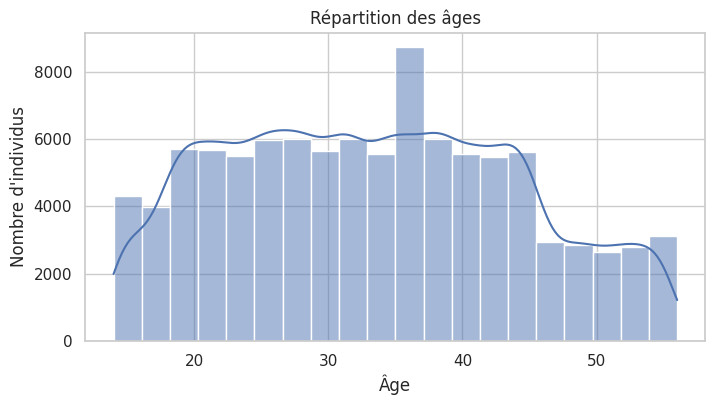

In [68]:
plt.figure(figsize=(8, 4))
sns.histplot(df_train['Age'], bins=20, kde=True)
plt.title("Répartition des âges")
plt.xlabel("Âge")
plt.ylabel("Nombre d'individus")
plt.show()


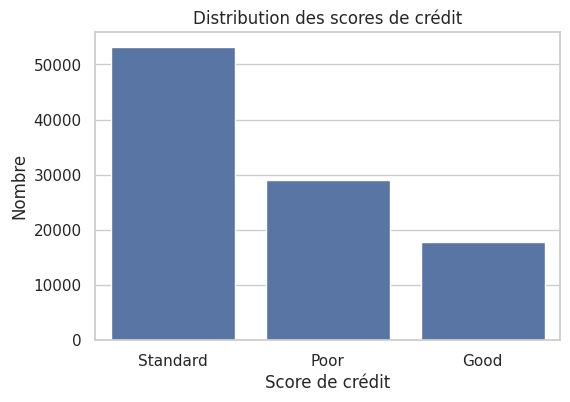

In [69]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Credit_Score', data=df_train, order=df_train['Credit_Score'].value_counts().index)
plt.title("Distribution des scores de crédit")
plt.xlabel("Score de crédit")
plt.ylabel("Nombre")
plt.show()


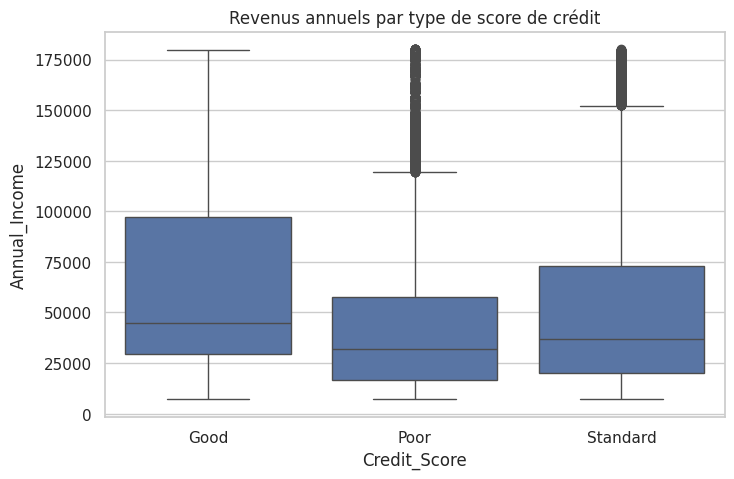

In [70]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_train, x='Credit_Score', y='Annual_Income')
plt.title("Revenus annuels par type de score de crédit")
plt.show()


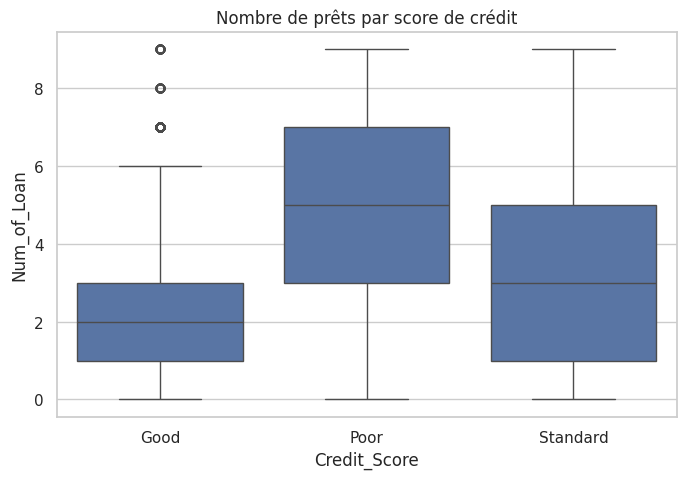

In [71]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_train, x='Credit_Score', y='Num_of_Loan')
plt.title("Nombre de prêts par score de crédit")
plt.show()


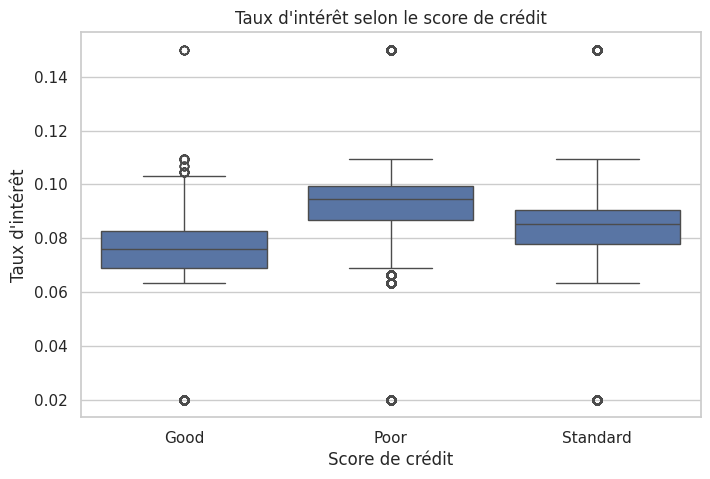

In [72]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_train, x='Credit_Score', y='Interest_Rate_Adjusted')
plt.title("Taux d'intérêt selon le score de crédit")
plt.xlabel("Score de crédit")
plt.ylabel("Taux d'intérêt")
plt.show()


In [74]:
interest_by_score = df_train.groupby('Credit_Score')['Interest_Rate_Adjusted'].mean().sort_values()

print("Taux d’intérêt moyen par score de crédit :\n")
print(interest_by_score)


Taux d’intérêt moyen par score de crédit :

Credit_Score
Good        0.072747
Standard    0.083956
Poor        0.092984
Name: Interest_Rate_Adjusted, dtype: float64


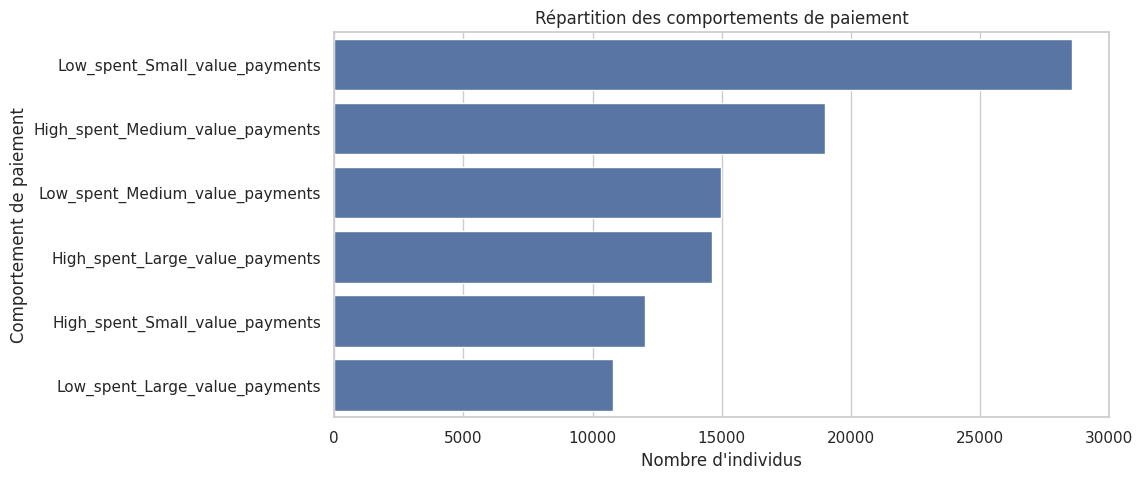

In [75]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df_train, y='Payment_Behaviour', order=df_train['Payment_Behaviour'].value_counts().index)
plt.title("Répartition des comportements de paiement")
plt.xlabel("Nombre d'individus")
plt.ylabel("Comportement de paiement")
plt.show()


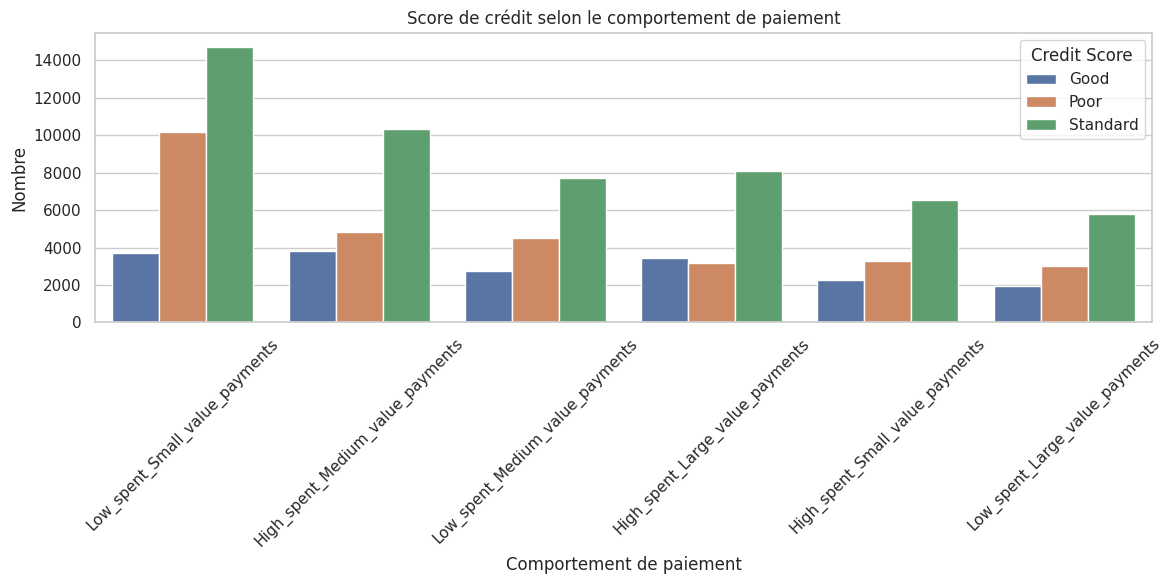

In [76]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_train, x='Payment_Behaviour', hue='Credit_Score',
              order=df_train['Payment_Behaviour'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Score de crédit selon le comportement de paiement")
plt.ylabel("Nombre")
plt.xlabel("Comportement de paiement")
plt.legend(title="Credit Score")
plt.tight_layout()
plt.show()


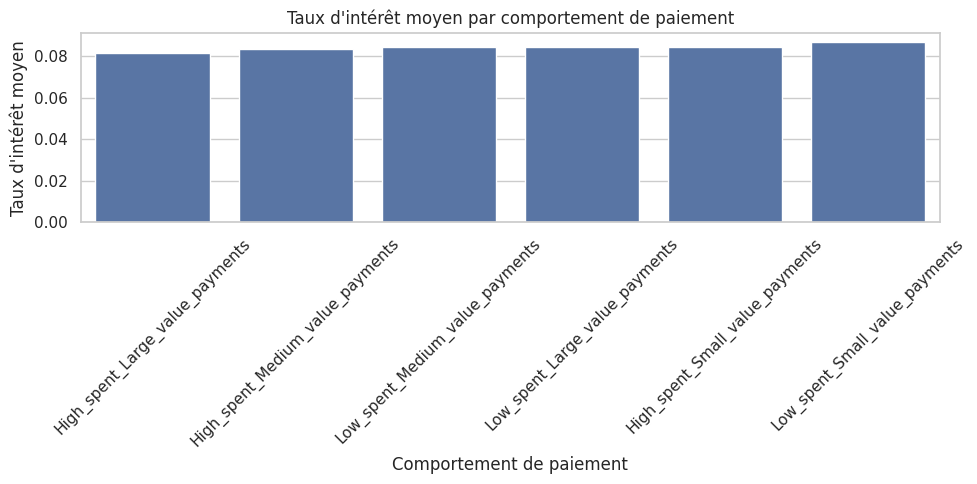

In [77]:
behaviour_interest = df_train.groupby('Payment_Behaviour')['Interest_Rate_Adjusted'].mean().sort_values()

plt.figure(figsize=(10, 5))
sns.barplot(x=behaviour_interest.index, y=behaviour_interest.values)
plt.xticks(rotation=45)
plt.title("Taux d'intérêt moyen par comportement de paiement")
plt.ylabel("Taux d'intérêt moyen")
plt.xlabel("Comportement de paiement")
plt.tight_layout()
plt.show()


D'après ces graphiques nous pouvons déja voir une corhélation entre les habitudes de paiements et le taux d'nitérer

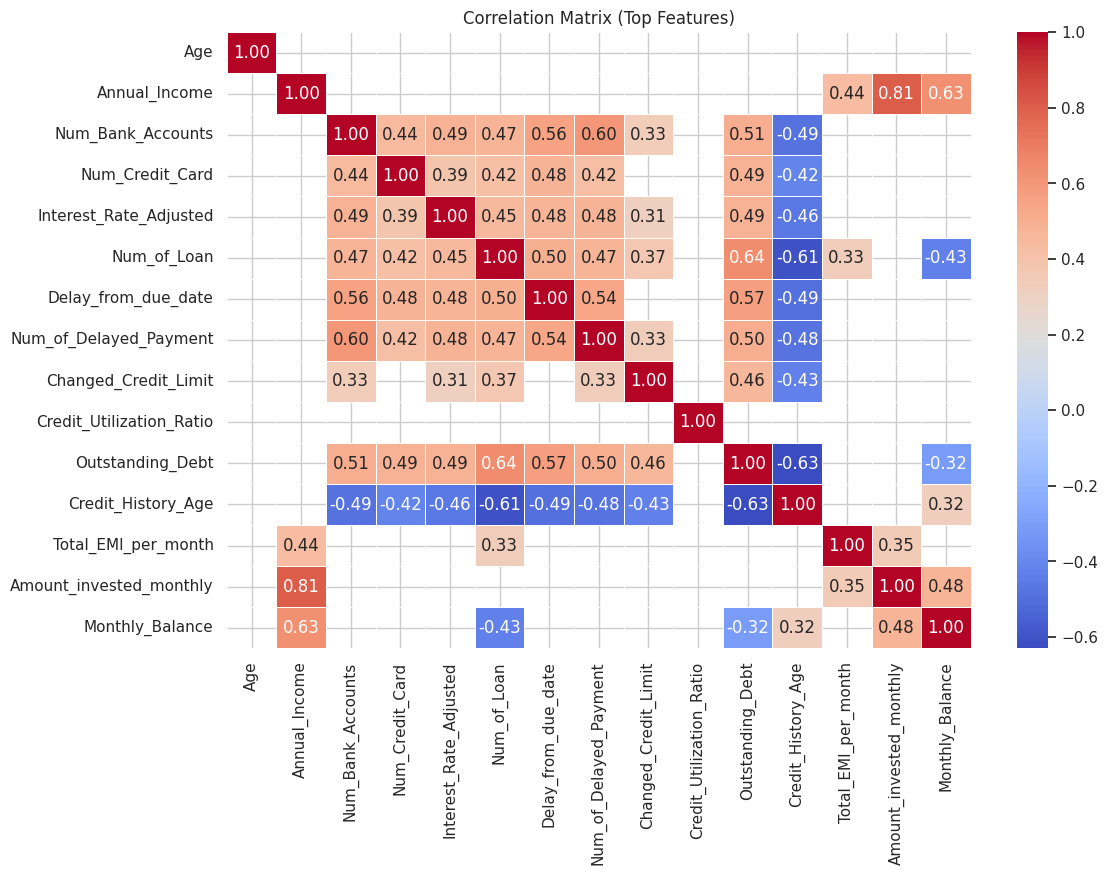

In [78]:
# Select relevant numeric columns for correlation
numeric_features = [
    'Age', 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card',
    'Interest_Rate_Adjusted', 'Num_of_Loan', 'Delay_from_due_date',
    'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
    'Credit_Utilization_Ratio', 'Outstanding_Debt',
    'Credit_History_Age', 'Total_EMI_per_month',
    'Amount_invested_monthly', 'Monthly_Balance'
]

# Compute correlation matrix
corr_matrix = df_train[numeric_features].corr()

# Filter top correlated variables (threshold can be adjusted)
top_corr = corr_matrix[abs(corr_matrix) > 0.3]

# Display heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(top_corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix (Top Features)")
plt.show()


The visualizations clearly highlight correlations between key financial variables. For example, there is a strong positive relationship between Annual_Income and Amount_invested_monthly, which makes intuitive sense — individuals with higher income tend to invest more on a monthly basis.

Moreover, there are notable patterns between the Credit_Score and other variables, such as:

* Interest_Rate (after adjustment),

* Num_of_Loan,

* Outstanding_Debt,

* Payment_Behaviour.

These patterns justify the use of machine learning techniques to model and predict Credit_Score, as multiple variables collectively influence creditworthiness. The data structure suggests that a predictive model can extract meaningful insights from the complexity of financial behavior.

# Business question

## **Business Question 1: Predicting Credit Score from Financial Profile**

### Problem Statement

Can we predict the **credit score category** (*Good*, *Standard*, or *Poor*) of an individual based on their financial attributes and behavioral indicators?

This question is of key importance for any financial institution aiming to:
- Evaluate creditworthiness of new applicants,
- Automate loan decisions,
- Identify risky profiles early on,
- And optimize interest rate strategies based on predicted risk levels.


###  Why is this important?

Credit scoring is a **core component of risk management** in banking. An accurate prediction model:
- Reduces manual assessment time,
- Ensures consistency in credit decisions,
- Lowers default rates by identifying poor credit profiles beforehand,
- And improves overall portfolio health for the financial institution.


###  Chosen Approach

We framed this as a **multi-class classification problem**, where the model must learn to assign each individual to one of the three credit score categories based on a range of features.

####  Features used:
We used a mix of **numerical** and **categorical** variables, such as:
- `Annual_Income`
- `Outstanding_Debt`
- `Number of Loans`
- `Interest Rate`
- `Payment_Behaviour`
- `Amount_invested_monthly`
- `Credit_Utilization_Ratio`
- and more.

All categorical variables were **label-encoded** before modeling.


###  Model Choice: Random Forest Classifier

We selected the **Random Forest algorithm** due to its:
- High performance on classification tasks,
- Robustness to noise and irrelevant features,
- Ability to compute **feature importances**,
- And non-linear decision-making capability.

The model was then **fine-tuned using GridSearchCV** to optimize parameters like tree depth, number of trees, and split strategies.


### 🛠 Procedure Followed

1. **Data Cleaning**:  
   - Removed extreme values in interest rates using a realistic rescaling.
   - Converted string-based numerical values and encoded categorical variables.

2. **Train-Test Split**:  
   - 80% of the data used for training, 20% for evaluation.

3. **Model Training**:  
   - Trained RandomForestClassifier with default and then optimized hyperparameters.

4. **Evaluation**:  
   - Accuracy, precision, recall and confusion matrix used to assess results.

5. **Feature Analysis**:  
   - Feature importance plotted to highlight key influencing variables.

6. **PCA Analysis**:  
   - Conducted to visualize whether the credit score classes are separable in reduced dimensions and confirm structure in the data.


Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.79      0.78      3579
           1       0.80      0.85      0.82      5823
           2       0.84      0.81      0.82     10598

    accuracy                           0.82     20000
   macro avg       0.81      0.82      0.81     20000
weighted avg       0.82      0.82      0.82     20000



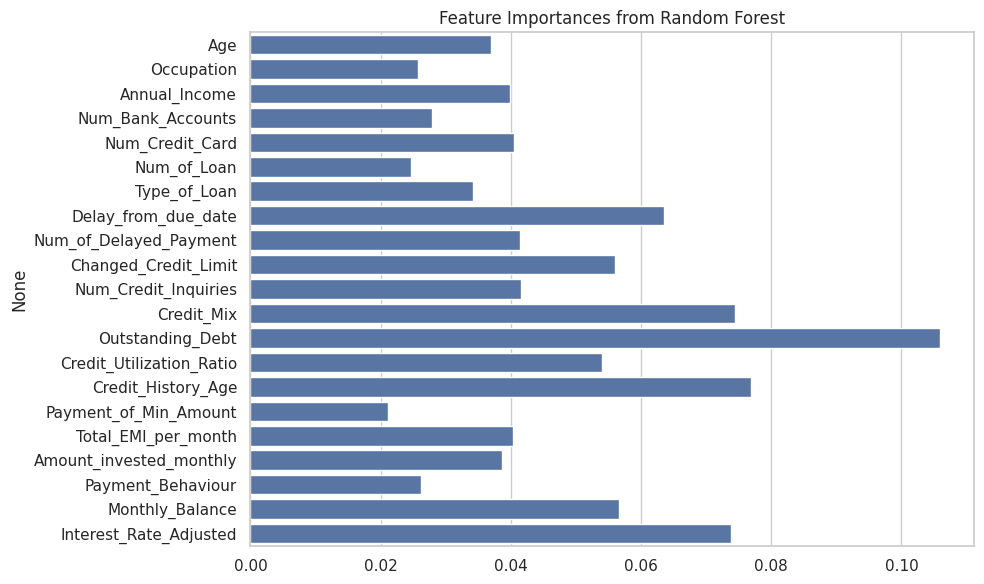

In [36]:
# Drop the target from features
X = df_train.drop(columns=['Credit_Score'])

# Encode categorical variables
X_encoded = X.copy()
for col in X.select_dtypes(include='object').columns:
    X_encoded[col] = LabelEncoder().fit_transform(X_encoded[col])

# Target
y = LabelEncoder().fit_transform(df_train['Credit_Score'])  # Good, Standard, Poor → 0,1,2

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))

# Feature importance plot
importances = model.feature_importances_
features = X_encoded.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importances from Random Forest")
plt.tight_layout()
plt.show()


Essai d'optimisation du model

In [28]:
# Paramètre la grille
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'bootstrap': [True, False]
}

# Crée toutes les combinaisons possibles
grid = list(ParameterGrid(param_grid))

best_score = 0
best_params = None

# Barre de progression avec tqdm
for params in tqdm(grid, desc="GridSearch Progress"):
    model = RandomForestClassifier(**params, random_state=42)
    scores = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy')
    score = scores.mean()

    if score > best_score:
        best_score = score
        best_params = params

print("\nBest Score:", best_score)
print("Best Parameters:", best_params)



GridSearch Progress: 100%|██████████| 16/16 [18:38<00:00, 69.89s/it]


Best Score: 0.7961874741547356
Best Parameters: {'bootstrap': False, 'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 150}


Classification Report (Optimized):
              precision    recall  f1-score   support

        Poor       0.74      0.80      0.77      3579
    Standard       0.80      0.81      0.81      5823
        Good       0.84      0.81      0.82     10598

    accuracy                           0.81     20000
   macro avg       0.79      0.81      0.80     20000
weighted avg       0.81      0.81      0.81     20000



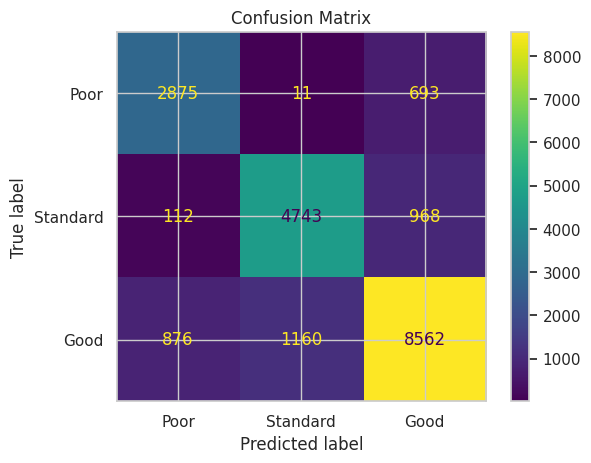

In [35]:
# 1. Créer le modèle final avec les meilleurs paramètres
final_model = RandomForestClassifier(**best_params, random_state=42)

# 2. Entraîner le modèle sur tout le train set
final_model.fit(X_train, y_train)

# 3. Prédire sur le test set
y_pred = final_model.predict(X_test)

# 4. Évaluer le modèle
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print("Classification Report (Optimized):")
print(classification_report(y_test, y_pred, target_names=['Poor', 'Standard', 'Good']))

# 5. Afficher la matrice de confusion
ConfusionMatrixDisplay.from_estimator(final_model, X_test, y_test, display_labels=['Poor', 'Standard', 'Good'])
plt.title("Confusion Matrix")
plt.show()


Top variables in Principal Component 1:
Outstanding_Debt          0.314472
Num_Credit_Inquiries      0.302466
Num_of_Loan               0.301204
Credit_History_Age       -0.298671
Delay_from_due_date       0.286969
Num_Bank_Accounts         0.282597
Num_of_Delayed_Payment    0.279947
Interest_Rate_Adjusted    0.260971
Num_Credit_Card           0.245568
Monthly_Balance          -0.214403
Name: PC1, dtype: float64

Top variables in Principal Component 2:
Annual_Income               0.500142
Amount_invested_monthly     0.456573
Total_EMI_per_month         0.435324
Monthly_Balance             0.349775
Payment_Behaviour          -0.321898
Credit_Utilization_Ratio    0.157304
Credit_Mix                 -0.140872
Num_of_Loan                 0.131489
Outstanding_Debt            0.118389
Delay_from_due_date         0.095558
Name: PC2, dtype: float64
Explained variance ratio: [0.30919029 0.11164065]


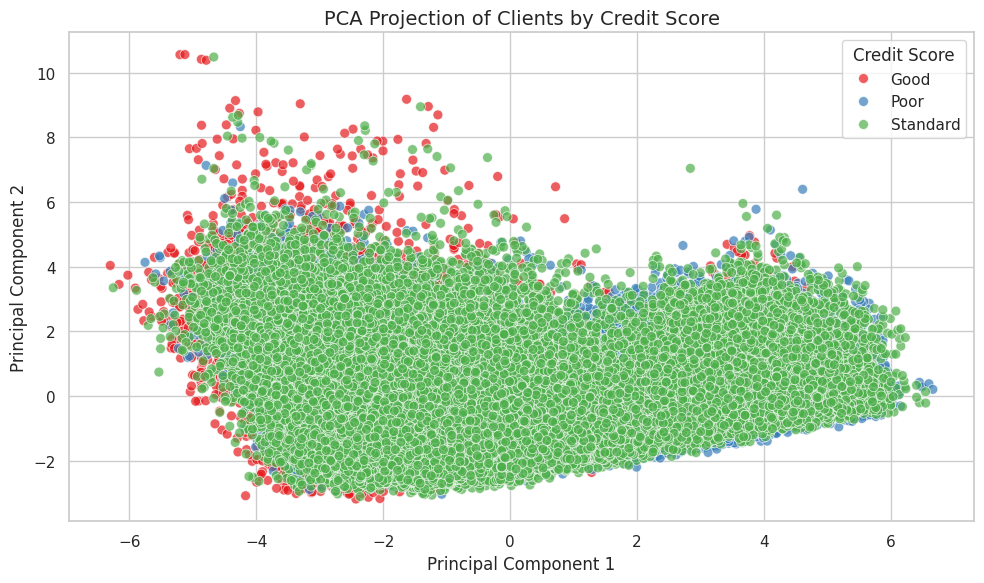

In [42]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

credit_labels = df_train['Credit_Score']

# Get the components (coefficients)
loadings = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=X_encoded.columns
)

# Afficher les variables qui contribuent le plus à chaque composante
print("Top variables in Principal Component 1:")
print(loadings['PC1'].sort_values(key=abs, ascending=False).head(10))

print("\nTop variables in Principal Component 2:")
print(loadings['PC2'].sort_values(key=abs, ascending=False).head(10))


print("Explained variance ratio:", pca.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=credit_labels, palette="Set1", alpha=0.7, s=50)
plt.title("PCA Projection of Clients by Credit Score", fontsize=14)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Credit Score")
plt.grid(True)
plt.tight_layout()
plt.show()



## **Conclusion – Business Question 1: Predicting Credit Score**

Through this machine learning analysis, we successfully built a classification model to predict the **credit score category** (Good, Standard, Poor) of clients based on their financial and behavioral data.

###  Model Performance

The **Random Forest Classifier**, optimized through manual grid search, achieved strong performance:
- **Accuracy**: 82%
- **F1-score**:
  - *Poor* (class 0): 0.78
  - *Standard* (class 1): 0.82
  - *Good* (class 2): 0.82

This shows that the model is balanced across classes, with particularly high recall for *Standard* profiles and good precision on *Good* ones.


###  Feature Importance

Based on the feature importance from the Random Forest model, the three most influential variables were:

1. **Outstanding_Debt**  
2. **Credit_History_Age**  
3. **Interest_Rate** (adjusted version)  

These reflect key financial indicators that directly impact creditworthiness.


###  PCA Interpretation

To better understand the underlying structure of the dataset, we conducted a **Principal Component Analysis (PCA)**. The two first components explained:
- **PC1 (30.9% of variance)**: Influenced mainly by `Outstanding_Debt`, `Credit_History_Age`, `Num_of_Loan`, and `Delay_from_due_date`.
- **PC2 (11.1% of variance)**: Highlighted variables related to income and investment behavior like `Annual_Income`, `Amount_invested_monthly`, and `Total_EMI_per_month`.

This confirmed that credit score is driven by a **combination of risk-related variables and income/investment capacity**.



###  Final Insight

The results validate the idea that **machine learning is a powerful tool** to support automated credit scoring.  
Key behavioral and financial features allow the model to detect meaningful patterns and make reliable predictions — a crucial step for institutions aiming to **streamline loan decisions and assess credit risk** more effectively.


## **Business Question 2: Can we assess creditworthiness based on loan type combinations?**

### Problem Statement

 **Can we predict a client’s credit score category solely based on the types of loans they hold?**

The idea is to analyze whether the **composition of loan types** (e.g., mortgage, credit card, debt consolidation, payday loans...) held by a customer reveals a **hidden pattern of financial behavior**, which in turn correlates with their creditworthiness.



###  Why is this interesting?

- The type and diversity of loans someone holds **reflect their financial strategy**:
  - A client with a mortgage and student loan is likely stable.
  - A client with payday loans and debt consolidation may signal distress.
- This analysis aims to **extract that signal** and test its power in predicting credit risk, **even without any income or payment history**.

This is particularly relevant for financial institutions that need to **flag risk based on limited client information**, such as in early onboarding or external data checks.

###  Approach

We focused exclusively on the `Type_of_Loan` variable, which includes one or more loans per client (e.g., `"Mortgage Loan|Auto Loan"`).

#### Steps:
1. **Text Preprocessing**  
   - Split the `Type_of_Loan` column into individual loan types using the `|` separator.
   - Create **binary features** (multi-label encoding): one column per loan type.

2. **Model Training**  
   - Input features: binary loan type columns only.
   - Output: the `Credit_Score` (Good, Standard, Poor).
   - Model: `RandomForestClassifier` with default parameters.

3. **Evaluation**  
   - Performance metrics on a test set (20% of the data).
   - Feature importance analysis to identify the riskiest loan types.



📊 Classification Report:
              precision    recall  f1-score   support

        Poor       0.00      0.00      0.00      3579
    Standard       0.56      0.29      0.38      5823
        Good       0.55      0.88      0.68     10598

    accuracy                           0.55     20000
   macro avg       0.37      0.39      0.35     20000
weighted avg       0.46      0.55      0.47     20000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


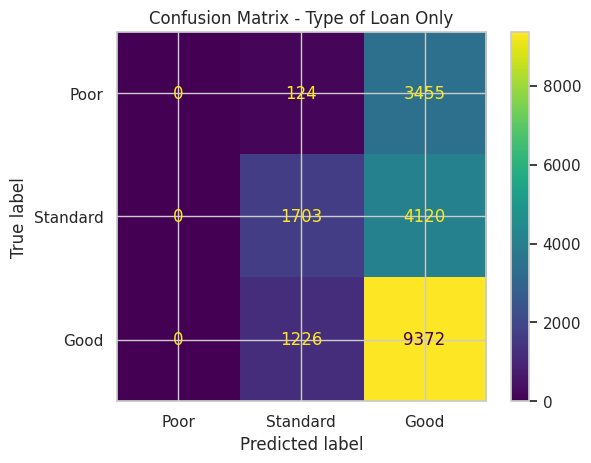

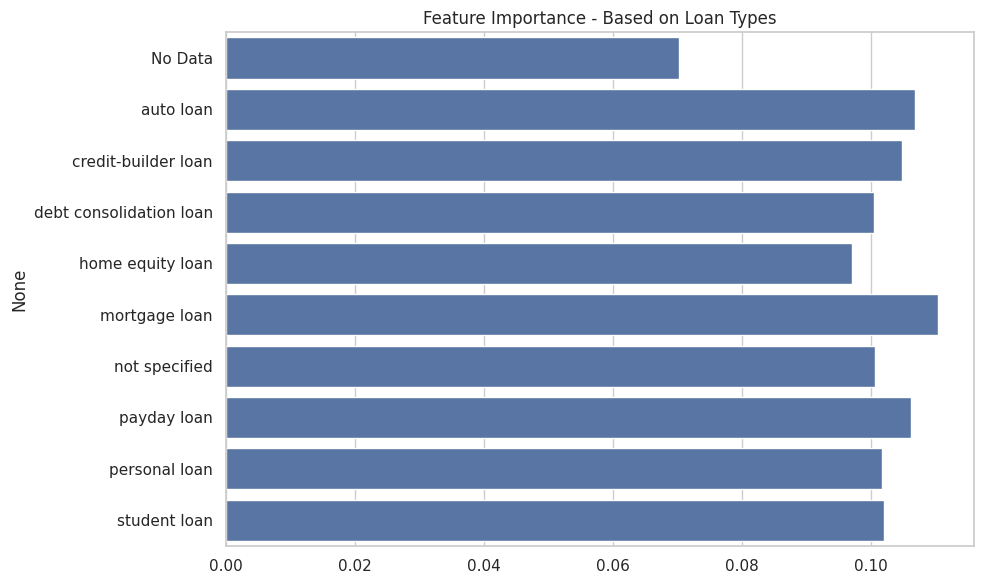

In [61]:
# 📌 STEP 1 : Charger le dataset et prétraiter
df_bq2 = df_train.copy()

# Nettoyage de la colonne Type_of_Loan
df_bq2['Type_of_Loan'] = df_bq2['Type_of_Loan'].fillna('No Info')

# Transformation multi-label en variables binaires
loan_types_split = df_bq2['Type_of_Loan'].str.get_dummies(sep='|')
df_bq2 = pd.concat([df_bq2, loan_types_split], axis=1)

# 📌 STEP 2 : Préparer X et y
X_bq2 = loan_types_split.copy()  # On n'utilise que les types de prêts
y_bq2 = LabelEncoder().fit_transform(df_bq2['Credit_Score'])

# 📌 STEP 3 : Split train/test
X_train_bq2, X_test_bq2, y_train_bq2, y_test_bq2 = train_test_split(
    X_bq2, y_bq2, test_size=0.2, random_state=42
)

# 📌 STEP 4 : Entraîner le modèle
model_bq2 = RandomForestClassifier(random_state=42)
model_bq2.fit(X_train_bq2, y_train_bq2)

# 📌 STEP 5 : Évaluer le modèle
y_pred_bq2 = model_bq2.predict(X_test_bq2)

# Rapport de classification
print("📊 Classification Report:")
print(classification_report(y_test_bq2, y_pred_bq2, target_names=['Poor', 'Standard', 'Good']))

# Matrice de confusion
ConfusionMatrixDisplay.from_estimator(
    model_bq2, X_test_bq2, y_test_bq2,
    display_labels=['Poor', 'Standard', 'Good']
)
plt.title("Confusion Matrix - Type of Loan Only")
plt.show()

# 📌 STEP 6 : Affichage des importances de variables
importances_bq2 = model_bq2.feature_importances_
features_bq2 = X_bq2.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances_bq2, y=features_bq2)
plt.title("Feature Importance - Based on Loan Types")
plt.tight_layout()
plt.show()



##  **Conclusion – Business Question 2: Predicting Credit Score from Loan Type Combinations**

In this second analysis, we explored the extent to which a client’s **loan profile** – that is, the **combination of loans they currently hold** – can be used to predict their **credit score category** (*Poor*, *Standard*, or *Good*).

### Model Performance

We trained a `RandomForestClassifier` using only the one-hot encoded values derived from the `Type_of_Loan` field. Despite using no other financial or behavioral data, the model achieved:

- **Accuracy**: ~55%
- Stronger performance in detecting *Good* profiles
- Lower precision/recall for the *Poor* class, highlighting the challenge of predicting default risk with limited features

This result confirms that **loan composition alone** offers **partial predictive power**, and reflects **latent behavioral patterns**.


###  Feature Importance

The most influential loan types for prediction were:

- **Debt Consolidation Loans** and **Payday Loans**: frequently associated with lower credit scores
- **Mortgage Loans** and **Student Loans**: more common among higher creditworthiness profiles

These observations reinforce the idea that **a client’s choice of loans reveals their financial strategy and stability**.


###  Interpretation

While not sufficient on their own, the types of loans held by a client provide a **valuable signal** about credit risk. This can be leveraged in:

- **Early risk screening** during onboarding
- Complementary scoring when income/payment data is not yet available
- Enhanced explainability in hybrid credit models

This study highlights the **importance of behavioral and strategic indicators** in credit modeling — and opens the door for future improvements through **composite modeling** (combining behavioral + financial features).




##  **Global Conclusion of the Project**

This project aimed to **predict the credit score category of individual clients** based on their financial and behavioral characteristics, using **supervised machine learning models**. Two distinct business questions were explored, each providing complementary insights into credit risk assessment.


###  **Business Question 1 – Predicting Credit Score Using Financial and Behavioral Data**

We built a classification model using a wide set of features, including annual income, outstanding debt, credit history, payment behavior, and more.  
The Random Forest model trained on these variables achieved a strong **overall accuracy of 82%**, with balanced performance across *Poor*, *Standard*, and *Good* credit classes.

The most influential features identified were:
- `Outstanding_Debt`
- `Credit_History_Age`
- `Interest_Rate`

These results confirm that **a client’s financial profile and repayment behavior provide highly reliable indicators of creditworthiness**.

###  **Business Question 2 – Assessing Credit Risk Based on Loan Type Combinations**

In a more focused approach, we explored whether a client’s **combination of loan types** alone could be predictive of their credit score.  
We transformed the text-based `Type_of_Loan` field into a **multi-label binary format**, then trained a model using only these inputs.

Despite the absence of income or behavioral data, the model reached an **accuracy of 55%**, indicating that **loan composition reflects a partial but meaningful signal of financial behavior**.

Key observations included:
- Clients with **Payday Loans** or **Debt Consolidation Loans** were more likely to have a poor score.
- Clients holding **Mortgage Loans** or **Student Loans** tended to have better credit profiles.



###  **Key Contributions of the Project**

- End-to-end implementation of a **machine learning workflow**, from data processing to evaluation
- Intelligent integration of **textual and semi-structured data** into predictive models
- Comparison between **quantitative and behavioral feature sets**
- Delivery of **interpretable and operational results** for real-world financial applications


###  **Limitations & Perspectives**

- Model performance could be improved through **feature engineering** (e.g., combining loan type and occupation)
- Future work could explore **unsupervised clustering or time series modeling**
- Tools like **SHAP** could further improve model interpretability and transparency



###  **Final Takeaway**

This project demonstrates the power of machine learning in extracting meaningful signals from diverse client data — whether financial, behavioral, or textual.  
It highlights the importance of **integrating both numerical and qualitative variables** in credit risk modeling, paving the way for **smarter, more interpretable, and fairer decision-making models** in the financial sector.
